In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from bresenham import bresenham
from numpy import matmul as mm
from tqdm import tqdm
import math
import tqdm

data = sio.loadmat('practice.mat')

In [2]:
pose = data['pose']; ranges = data['ranges']
scanAngles = data['scanAngles']; t = data['t']

In [3]:
param = {}
param['resol'] = 25
param['size'] = np.array([900,900])
param['origin'] = np.array([[700],[600]])
param['lo_occ'],param['lo_free']=1,.5
param['lo_max'],param['lo_min']=100,-100

In [4]:
def occGridMapping(ranges,scanAngles,pose,param):
    myResol = param['resol']; myMap = np.zeros(param['size'])
    myorigin = param['origin']; nsensors = len(scanAngles)
    N = pose.shape[1]
    lo_occ,lo_free = param['lo_occ'],param['lo_free']
    lo_max,lo_min = param['lo_max'],param['lo_min']
    
    fig = plt.figure(figsize=(20,10))
    plt.ion()
    fig.show()
    fig.canvas.draw()
    
    for j in tqdm.tqdm(range(N)):
        xrobot,yrobot,theta = pose[0,j],pose[1,j],pose[2,j]
        ixrobot = int(np.ceil(myResol*xrobot)+myorigin[0])
        iyrobot = int(np.ceil(myResol*yrobot)+myorigin[1])
        
        for sensor in range(nsensors):
            d = ranges[sensor,j]
            alpha = scanAngles[sensor]
            xocc = d*np.cos(theta+alpha)+xrobot
            yocc =-d*np.sin(theta+alpha)+yrobot
            ixocc = int(np.ceil(myResol*xocc))+myorigin[0]
            iyocc = int(np.ceil(myResol*yocc))+myorigin[1]
            free = np.array(list(bresenham(ixrobot,iyrobot,
                                           ixocc[0],iyocc[0])))
            myMap[ixocc,iyocc] += lo_occ
            for i in range(len(free)):
                myMap[tuple(free[i])] -= lo_free
        
        ax = plt.gca()
        ax.clear()
        ax.imshow(myMap,cmap='gray')
        ax.axis('equal')
        fig.canvas.draw()
    
    myMap = np.clip(myMap,lo_min,lo_max)
    return myMap

<IPython.core.display.Javascript object>


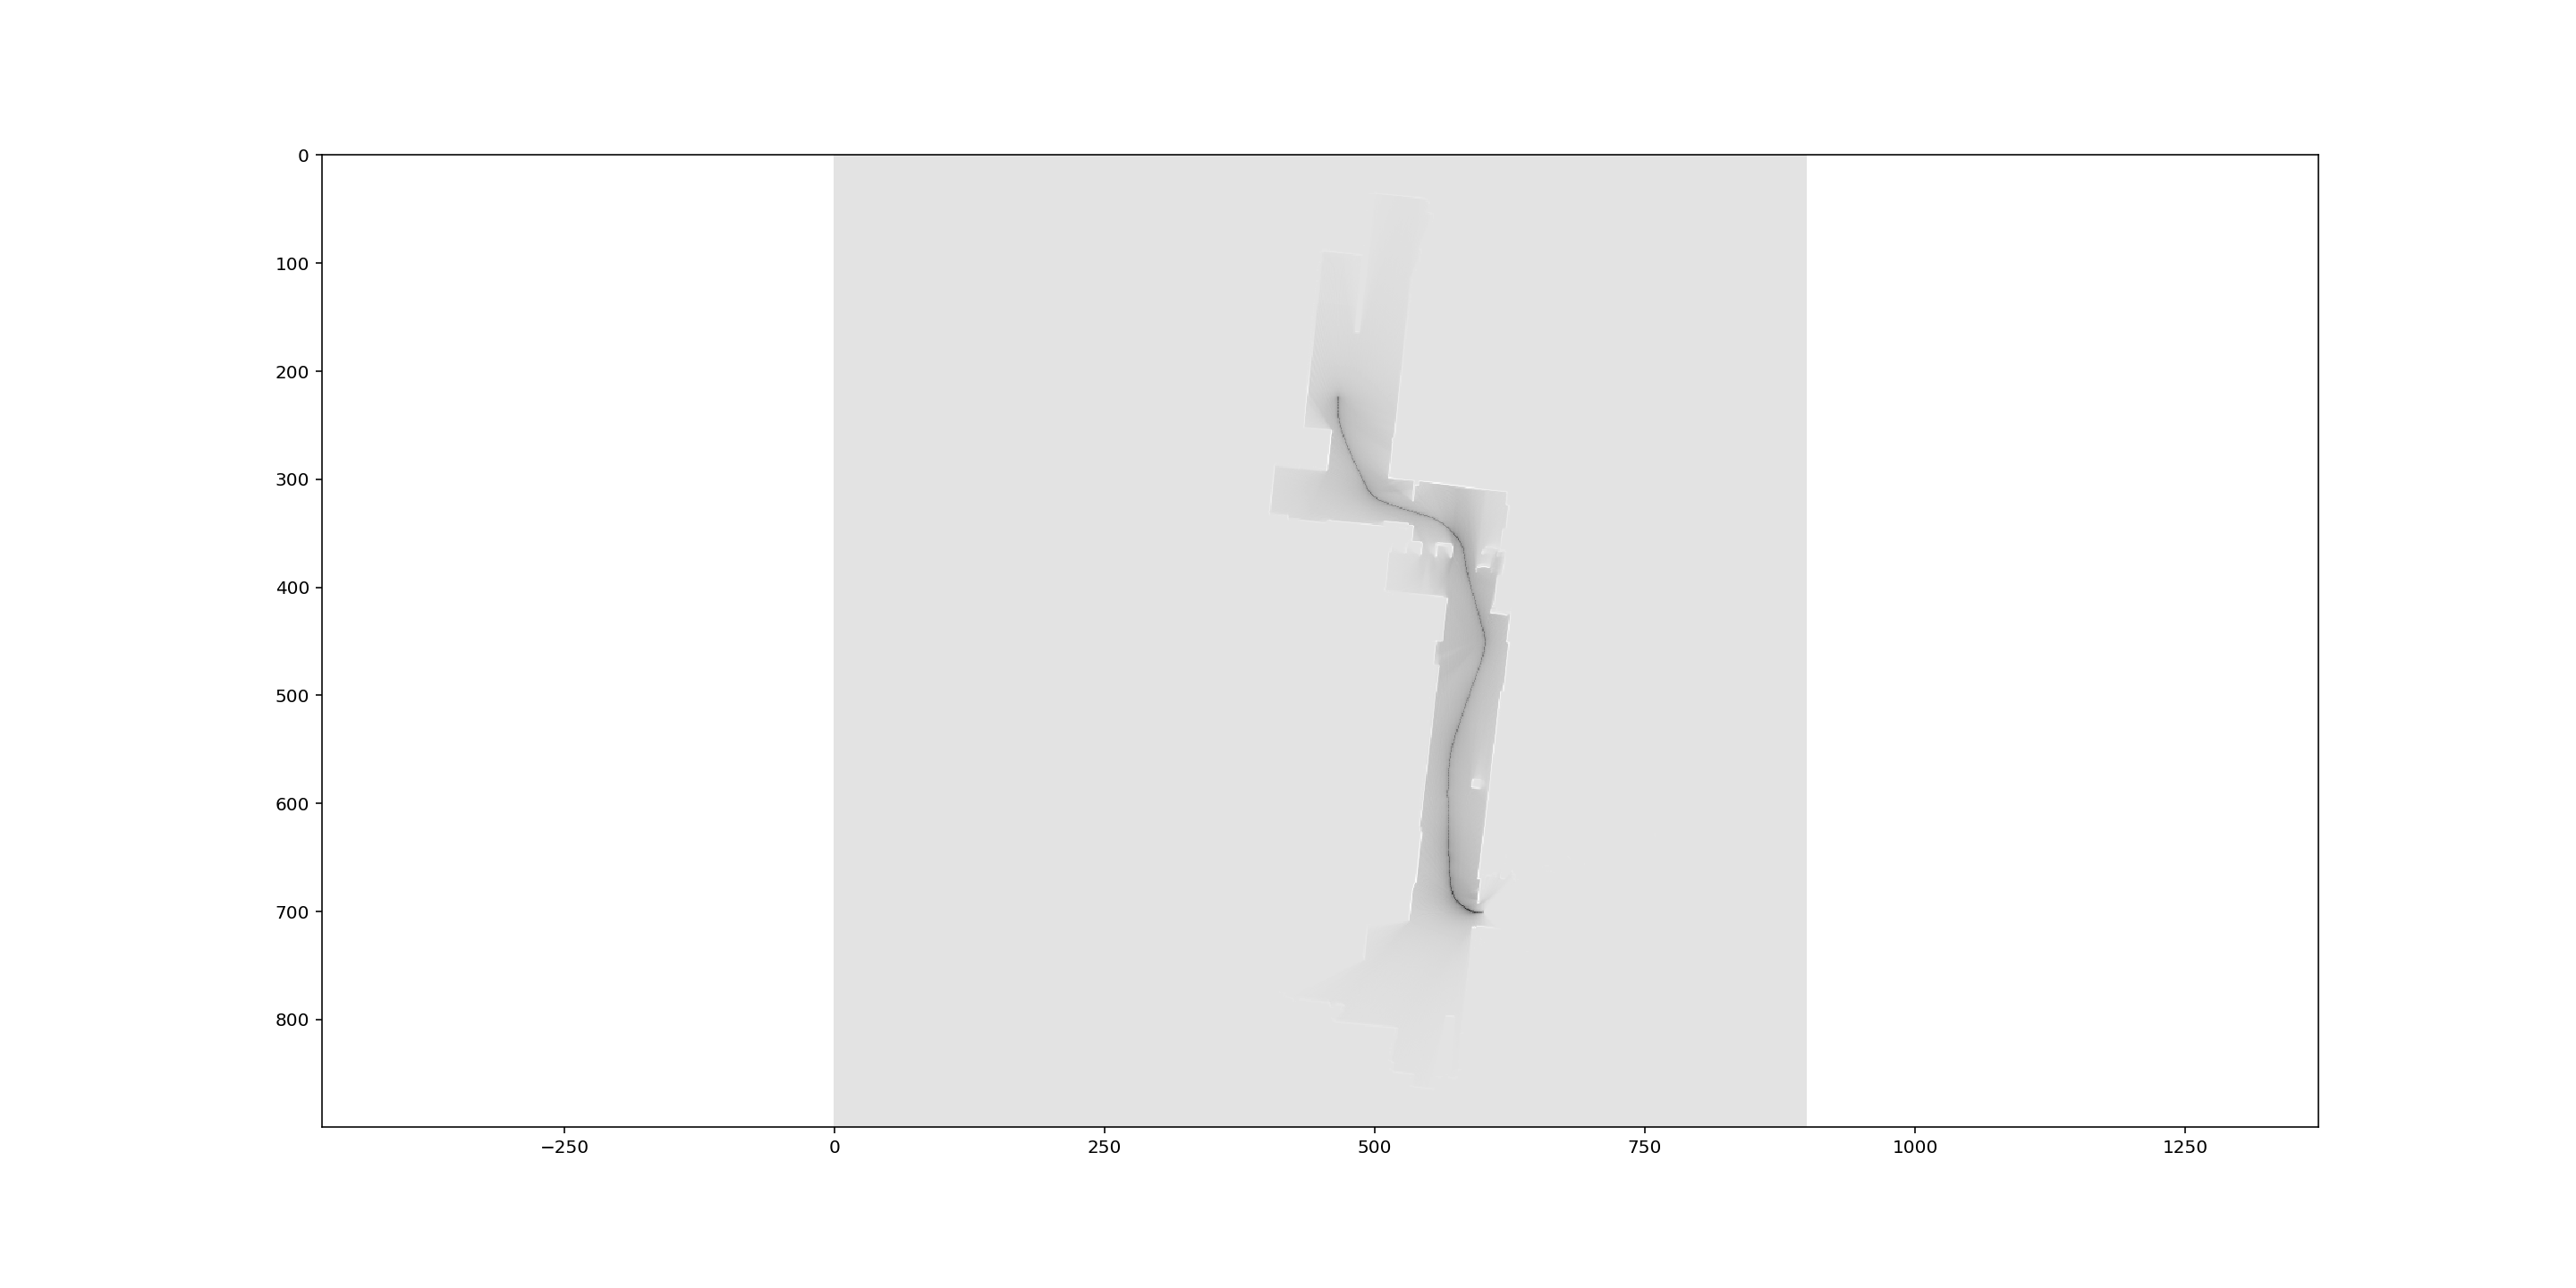

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [06:12<00:00,  2.69it/s]


In [5]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%matplotlib notebook
myMap = occGridMapping(ranges[:,:1000],scanAngles,
                      pose[:,:1000],param)

<IPython.core.display.Javascript object>


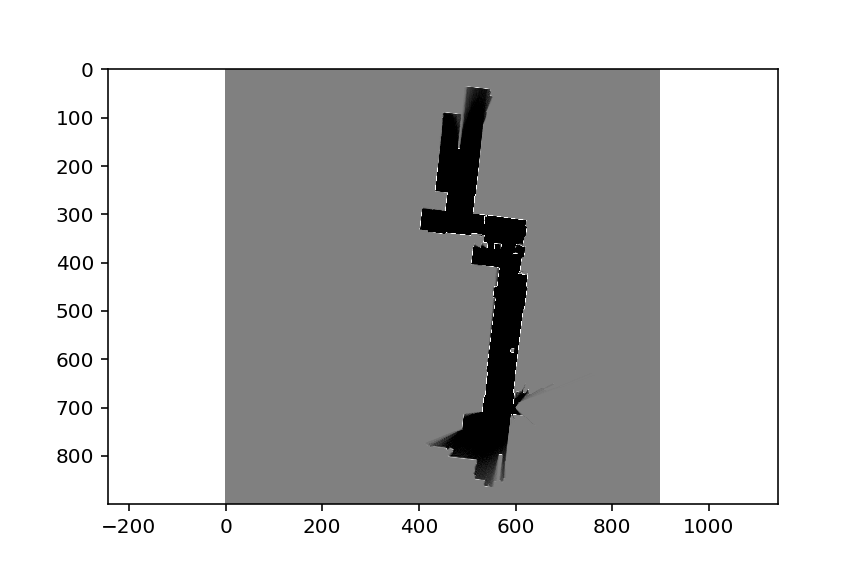

(-0.5, 899.5, 899.5, -0.5)

In [6]:
plt.imshow(myMap,cmap='gray')
plt.axis('equal')